In [105]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from sklearn.preprocessing import Imputer

In [106]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Les données d'apprentissage comportent 307 511 observations (chacune un emprunt distinct) et 122 caractéristiques (variables), y compris la CIBLE (l'étiquette que nous voulons prédire).

In [108]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


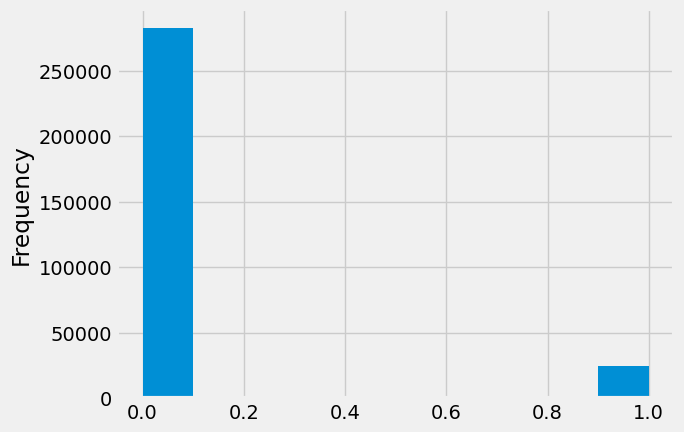

In [110]:
app_train['TARGET'].astype(int).plot.hist();

In [111]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

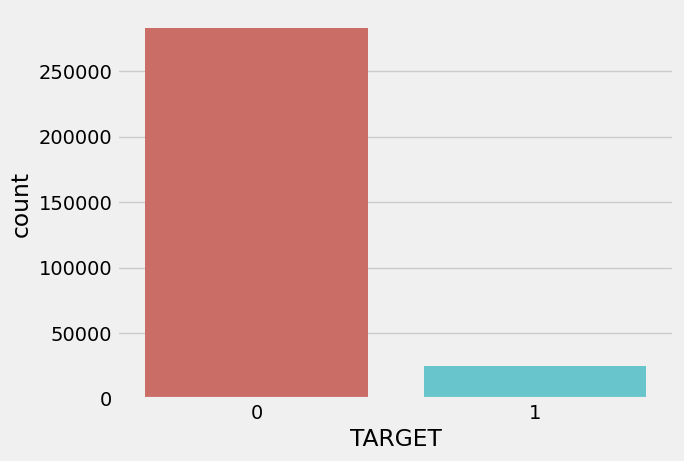

<Figure size 640x480 with 0 Axes>

In [112]:
sns.countplot(x='TARGET', data=app_train, palette='hls')
plt.show()
plt.savefig('count_plot')

Il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui n'ont pas été remboursés. Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes en fonction de leur représentation dans les données pour refléter ce déséquilibre.

## Examinons les valeurs manquante

le nombre et le pourcentage de valeurs manquantes dans chaque colonne.

In [113]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [114]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Examinons maintenant le nombre d'entrées uniques dans chacune des colonnes d'objets (catégorielles).

In [115]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Encodage des variables catégorielles

Pour l'encodage des variables, nous utilisons Scikit-Learn LabelEncoder et pour l'encodage one-hot, la fonction pandas get_dummies(df).

In [116]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [117]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


Nous allons organiser maintenant les données puisque l'encodage a crée plus de colonnes dans les données d'apprentissage car il y avait des variables catégorielles avec des catégories non représentées dans les données de test. Pour supprimer les colonnes des données d'apprentissage qui ne figurent pas dans les données de test, nous devons aligner les dataframes.

In [118]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [119]:
(app_train['DAYS_BIRTH']train_labels = app_train['TARGET']
# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)/ -365).describe()

SyntaxError: invalid syntax (3052198070.py, line 1)

In [120]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

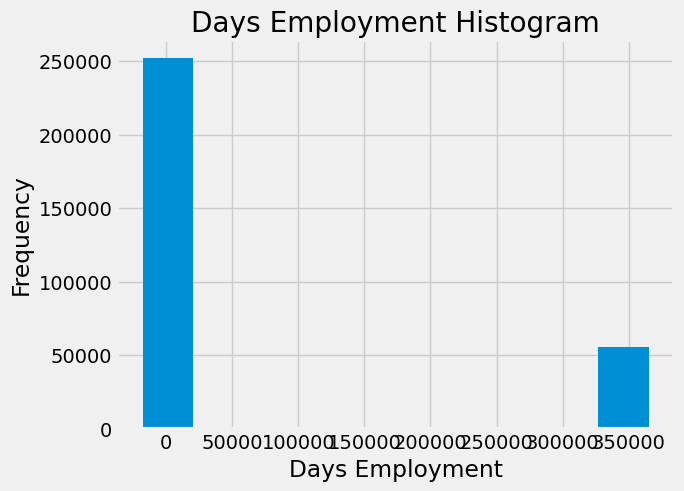

In [121]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

sous-divisons les clients anormaux et voyons s'ils ont tendance à avoir des taux de défaut plus élevés ou plus faibles que le reste des clients.

In [122]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Nous allons remplir les valeurs anormales sans un nombre (np.nan) puis créer une nouvelle colonne booléenne indiquant si la valeur était anormale ou non.

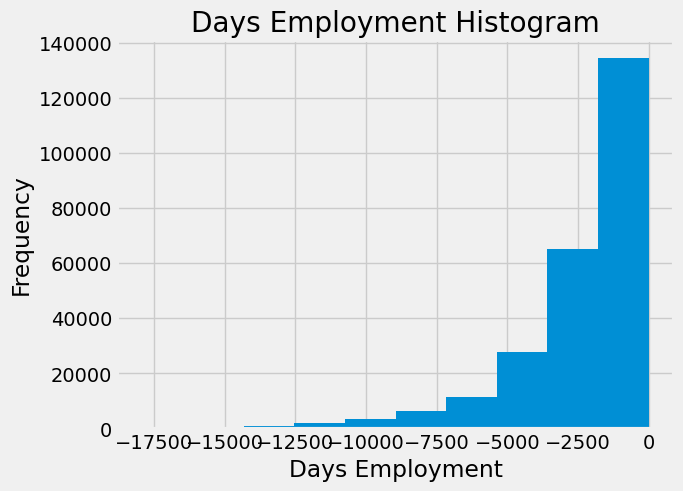

In [123]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [124]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# Correlations

In [125]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Examinons quelques-unes des corrélations les plus significatives : DAYS_BIRTH est la corrélation la plus positive. (sauf pour TARGET car la corrélation d'une variable avec elle-même est toujours 1 !) En regardant la documentation, DAYS_BIRTH est l'âge en jours du client au moment du prêt en jours négatifs (quelle qu'en soit la raison !). La corrélation est positive, mais la valeur de cette caractéristique est en fait négative, ce qui signifie qu'à mesure que le client vieillit, il est moins susceptible de faire défaut sur son prêt (c'est-à-dire la cible == 0). C'est un peu déroutant, nous prendrons donc la valeur absolue de la caractéristique, puis la corrélation sera négative.


## Effet de l'âge sur le remboursement

In [126]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

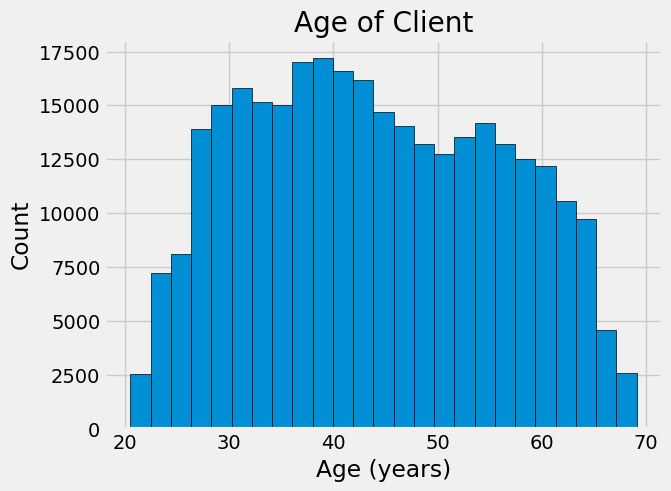

In [127]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [128]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [129]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


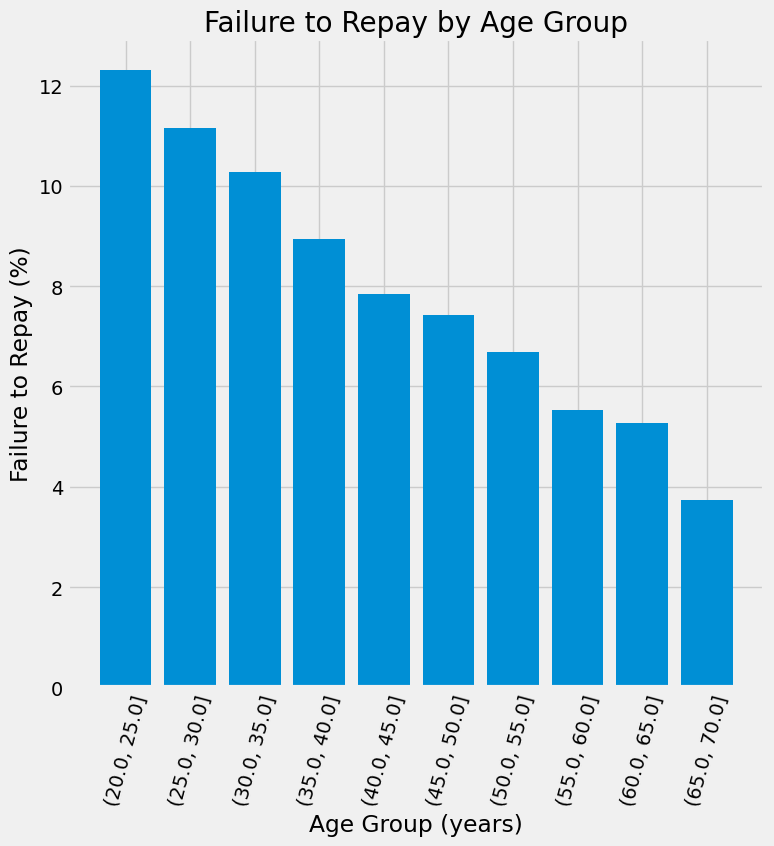

In [130]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Il y a une tendance claire : les jeunes demandeurs sont plus susceptibles de ne pas rembourser le prêt ! Le taux d'impayés est supérieur à 10 % pour les trois tranches d'âge les plus jeunes et inférieur à 5 % pour la tranche d'âge la plus élevée.

Il s'agit d'informations qui pourraient être directement utilisées par la banque : étant donné que les clients plus jeunes sont moins susceptibles de rembourser le prêt, il faudrait peut-être leur fournir davantage de conseils ou de conseils de planification financière. Cela ne signifie pas que la banque devrait discriminer les jeunes clients, mais il serait judicieux de prendre des mesures de précaution pour aider les jeunes clients à payer à temps.

# Exterior Sources

nous pouvons montrer les corrélations des caractéristiques EXT_SOURCE avec la cible et entre elles.

In [131]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


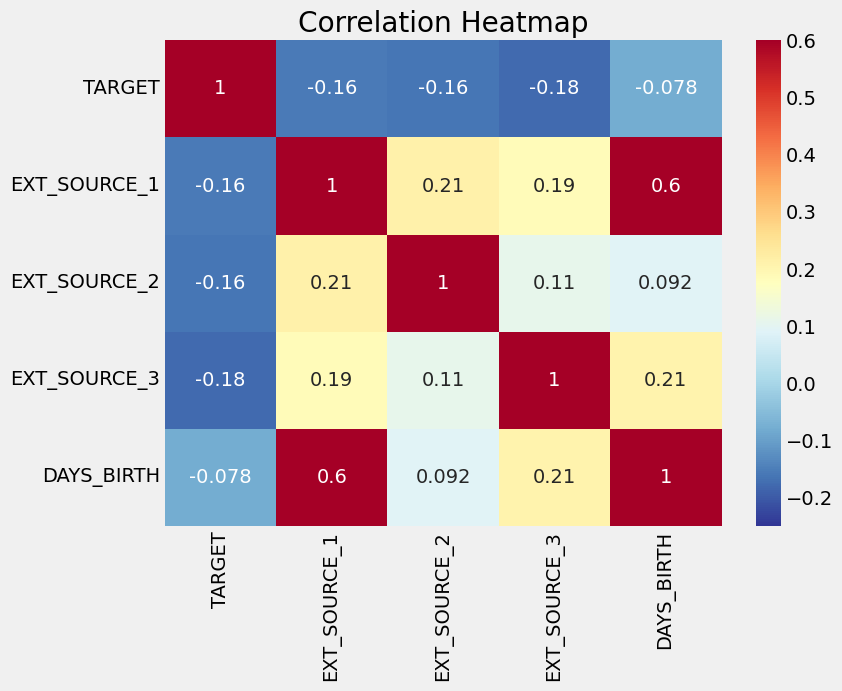

In [132]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique qu'à mesure que la valeur de EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1 indiquant que l'un des facteurs de ce score est peut-être l'âge du client.

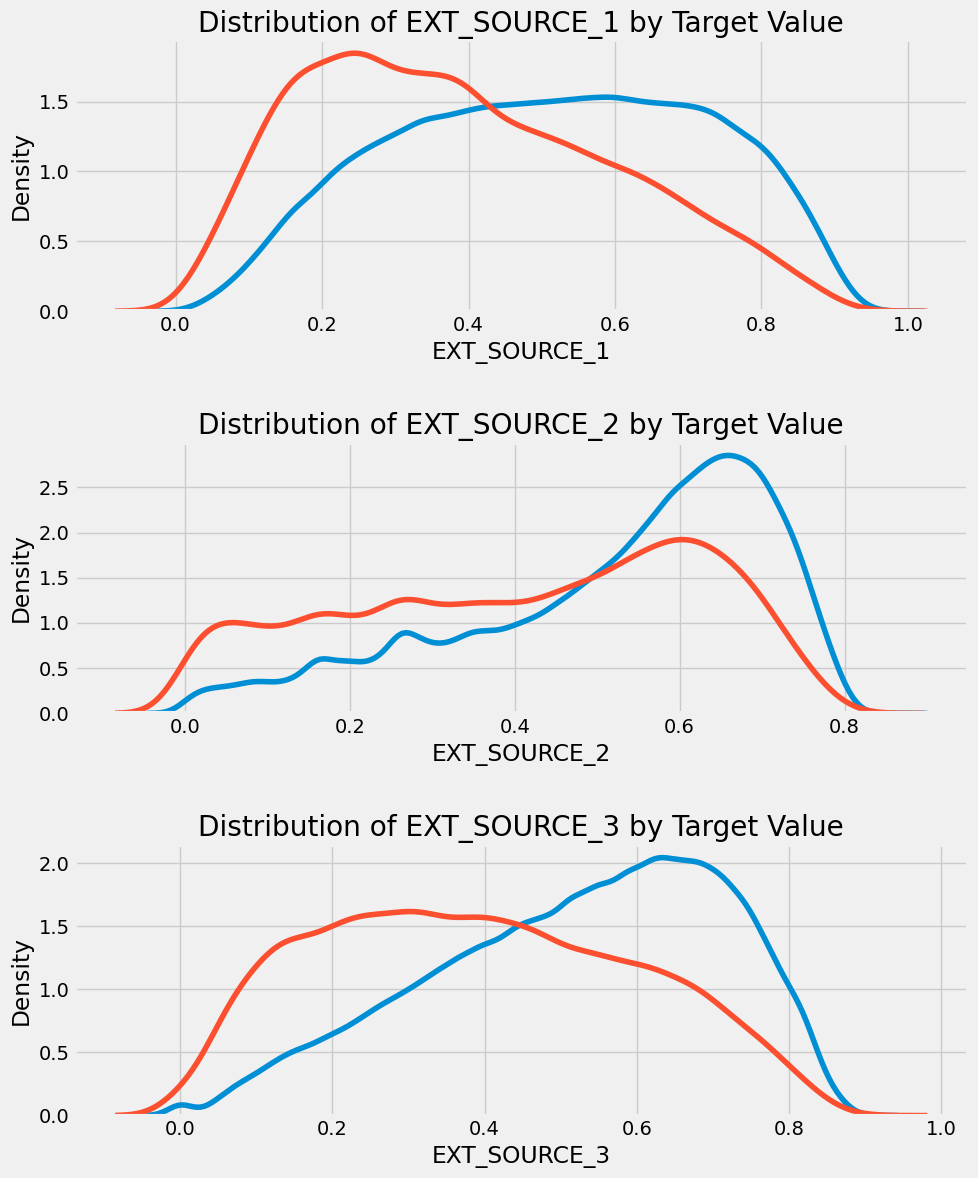

In [133]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un demandeur rembourse un prêt. La relation n'est pas très forte (en fait elles sont toutes considérées comme très faibles, mais ces variables seront tout de même utiles pour un modèle d'apprentissage automatique pour prédire si oui ou non un demandeur remboursera un prêt à temps.

# Feature Engineering des variables externes

Dans le code suivant, nous créons des entités polynomiales à l'aide des variables EXT_SOURCE et de la variable DAYS_BIRTH. Scikit-Learn a une classe utile appelée PolynomialFeatures qui crée les polynômes et les termes d'interaction jusqu'à un degré spécifié. Nous pouvons utiliser un degré de 3 pour voir les résultats (lorsque nous créons des entités polynomiales, nous voulons éviter d'utiliser un degré trop élevé, à la fois parce que le nombre d'entités évolue de manière exponentielle avec le degré et parce que nous pouvons rencontrer des problèmes avec sur-ajustement).

In [134]:
from sklearn.impute import SimpleImputer

In [135]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


Cela crée un nombre considérable de nouvelles fonctionnalités. Pour obtenir les noms, nous devons utiliser la méthode get_feature_names des caractéristiques polynomiales

In [136]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

Il existe 35 variables avec des variables individuelles élevées à des puissances allant jusqu'au degré 3 et des termes d'interaction. Maintenant, nous pouvons voir si l'une de ces nouvelles fonctionnalités est corrélée avec la cible.

In [137]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.194235
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189593
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181417
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176589
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.171729
EXT_SOURCE_1 EXT_SOURCE_2                -0.166538
EXT_SOURCE_1 EXT_SOURCE_3                -0.164933
EXT_SOURCE_2                             -0.160303
EXT_SOURCE_3                             -0.157397
EXT_SOURCE_2 DAYS_BIRTH                  -0.156879
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Plusieurs des nouvelles variables ont une plus grande corrélation (en termes d'amplitude absolue) avec la cible que les caractéristiques d'origine. Lorsque nous construisons des modèles d'apprentissage automatique, nous pouvons essayer avec et sans ces fonctionnalités pour déterminer si elles aident réellement le modèle à apprendre.

Nous ajouterons ces fonctionnalités à une copie des données de formation et de test, puis évaluerons les modèles avec et sans les fonctionnalités. Souvent, dans l'apprentissage automatique, la seule façon de savoir si une approche fonctionnera est de l'essayer !


In [138]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


# Feature Engineering des variables financieres

**Nous utiliserons les variables suivantes: 

** CREDIT_INCOME_PERCENT : le pourcentage du montant du crédit par rapport au revenu d'un client ** ANNUITY_INCOME_PERCENT: le pourcentage de l'annuité du prêt par rapport au revenu d'un client ** CREDIT_TERM : la durée du paiement en mois (puisque l'annuité est le montant mensuel dû ** DAYS_EMPLOYED_PERCENT : le pourcentage de jours employés par rapport à l'âge du client

In [139]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

Visualisons les nouvelles variables

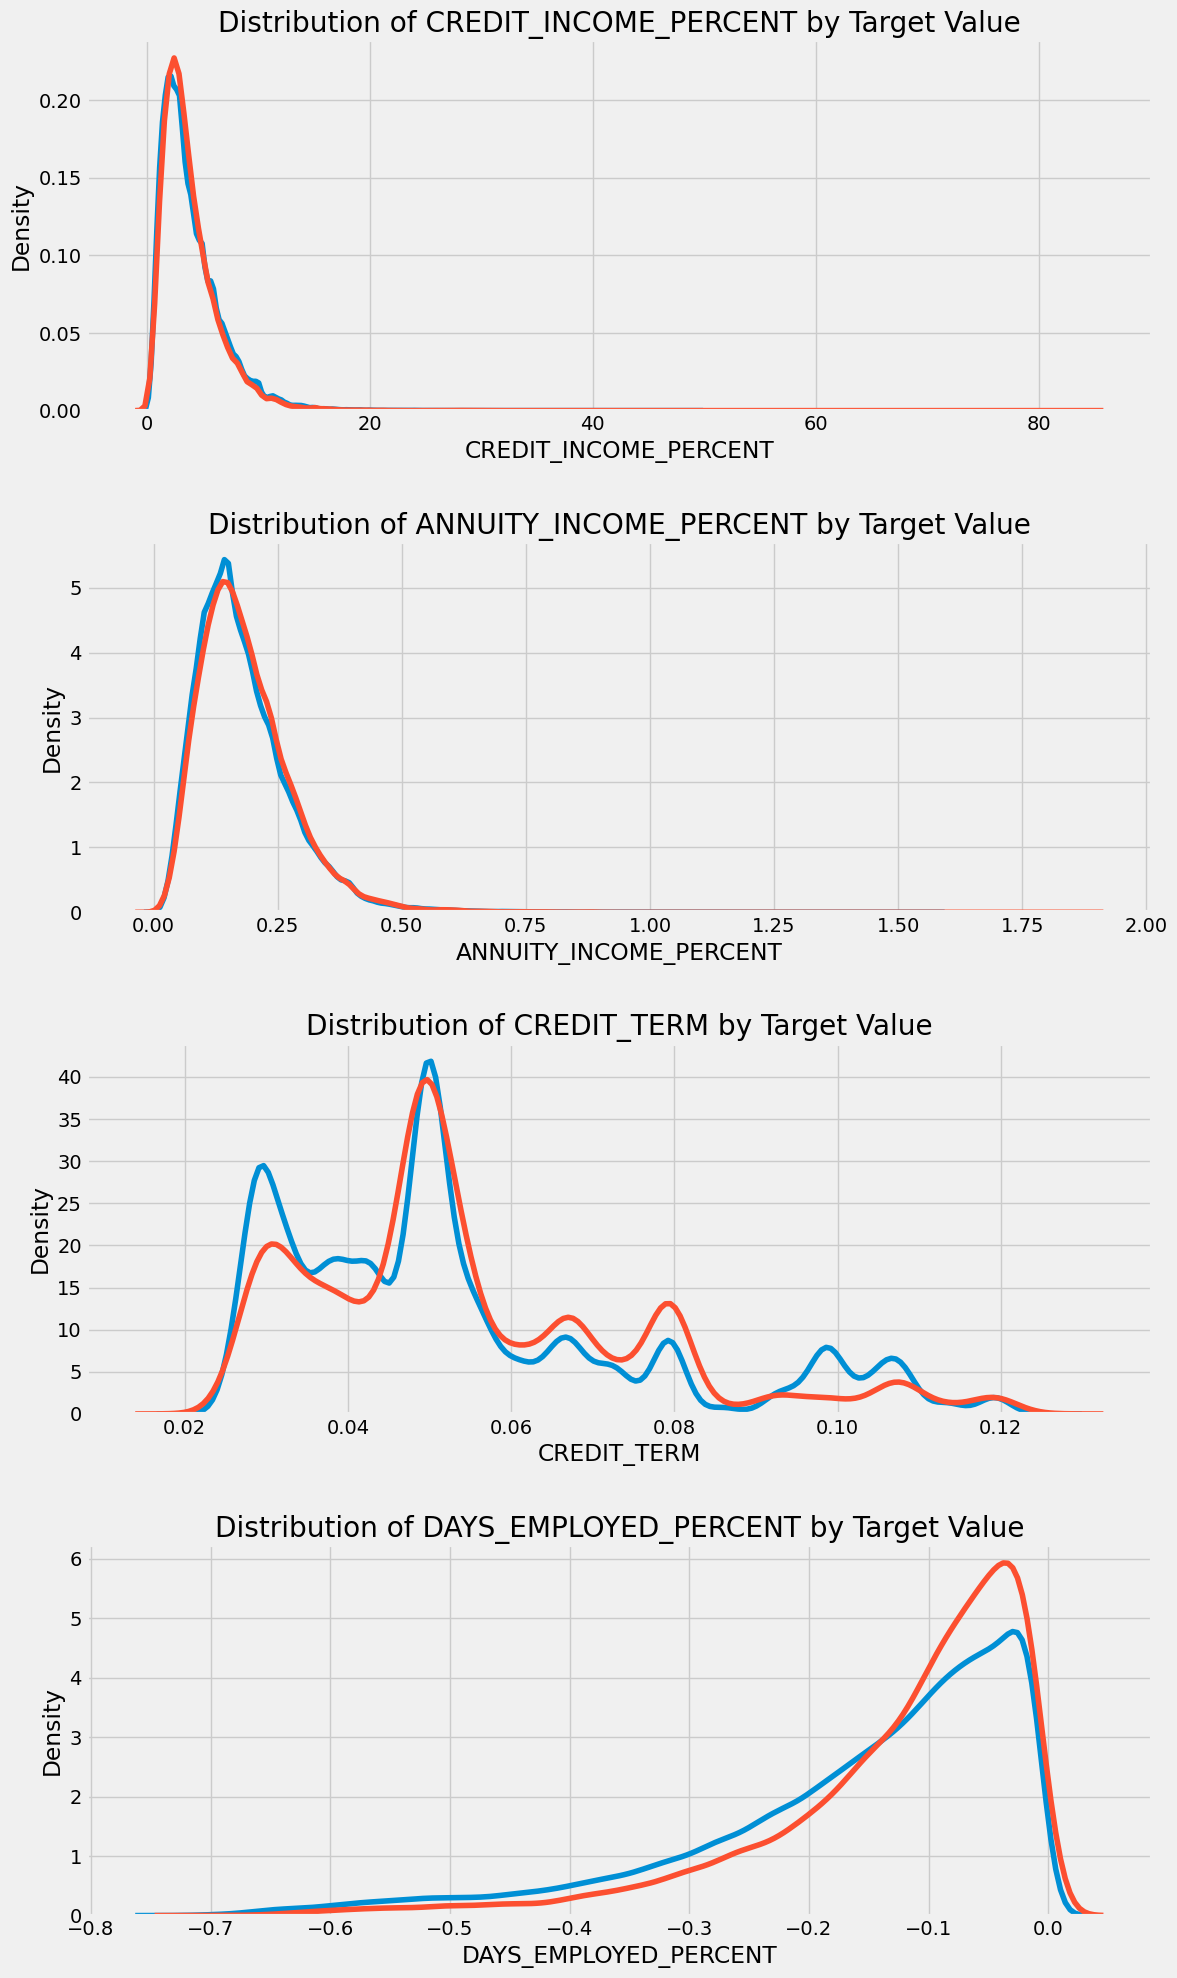

In [140]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

Il est difficile de dire à l'avance si ces nouvelles fonctionnalités seront utiles. La seule façon de le dire avec certitude, c'est de les essayer !

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
#imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [143]:
from sklearn.metrics import confusion_matrix, classification_report

In [144]:
import numpy as np
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.20, random_state=42)

In [146]:
X_train.shape,  X_test.shape, 

((246008, 240), (61503, 240))

## Précision de calcul, rappel, F-mesure 

***La précision est le rapport tp/(tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux positifs. La précision est intuitivement la capacité du classificateur à ne pas étiqueter un échantillon comme positif s'il est négatif.

***Le rappel est le rapport tp/(tp + fn) où tp est le nombre de vrais positifs et fn le nombre de faux négatifs. Le rappel est intuitivement la capacité du classificateur à trouver tous les échantillons positifs.

***Le score F-beta peut être interprété comme une moyenne harmonique pondérée de la précision et du rappel, où un score F-beta atteint sa meilleure valeur à 1 et son pire score à 0.

***Le score F-beta pondère le rappel plus que la précision par un facteur de bêta. bêta = 1,0 signifie que le rappel et la précision sont tout aussi importants.

## Utilisation de l’algorithme SMOTE avec la regression logistique

In [147]:
from imblearn import under_sampling, over_sampling

In [148]:
from imblearn.over_sampling import SMOTE as sm

In [149]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 19876
Before OverSampling, counts of label '0': 226132 

After OverSampling, the shape of train_X: (452264, 240)
After OverSampling, the shape of train_y: (452264,) 

After OverSampling, counts of label '1': 226132
After OverSampling, counts of label '0': 226132


Le smote nous a permit d'avoir le même nombre de données en 0 et 1 

## Prédiction et rappel

In [150]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56554
           1       0.16      0.65      0.25      4949

    accuracy                           0.69     61503
   macro avg       0.56      0.67      0.53     61503
weighted avg       0.89      0.69      0.76     61503



**Matrice de confusion 

In [151]:
from sklearn.metrics import confusion_matrix  
confusion_matrix = confusion_matrix(y_test, predictions)  
print(confusion_matrix) 

[[39368 17186]
 [ 1718  3231]]


### Deployement sur le test

Maintenant que le modèle a été formé, nous pouvons l'utiliser pour faire des prédictions. Nous voulons prédire les probabilités de ne pas rembourser un prêt, nous utilisons donc la méthode du modèle predict.proba. Cela renvoie un tableau m x 2 où m est le nombre d'observations. La première colonne est la probabilité que la cible soit 0 et la deuxième colonne est la probabilité que la cible soit 1 (donc pour une seule ligne, les deux colonnes doivent totaliser 1). Nous voulons la probabilité que le prêt ne soit pas remboursé, nous allons donc sélectionner la deuxième colonne.


In [152]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = lr1.predict_proba(test)[:, 1]

Les prédictions doivent être au format indiqué dans le fichier sample_submission.csv, où il n'y a que deux colonnes : SK_ID_CURR et TARGET. Nous allons créer une trame de données dans ce format à partir du jeu de test et des prédictions appelées submit.


In [153]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET_PROB'] = log_reg_pred
submit['TARGET'] = lr1.predict(test)

submit.head()

,SK_ID_CURR,TARGET_PROB,TARGET
0,100001,0.459872,0
1,100005,0.823662,1
2,100013,0.287322,0
3,100028,0.357186,0
4,100038,0.746818,1


Les prédictions représentent une probabilité comprise entre 0 et 1 que le prêt ne soit pas remboursé. Si nous utilisions ces prédictions pour classer les candidats, nous pourrions définir un seuil de probabilité pour déterminer qu'un prêt est risqué.


In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

In [ ]:
import pickle
#enregistrer le modèle
pickle.dump(log_reg,open('log_reg.pkl','wb'))

# Radom Forest 

##### Utilisation de l’algorithme SMOTE avec le random Forest 

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res.ravel())
predictions = rfc.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.34      0.01      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.63      0.50      0.49     61503
weighted avg       0.87      0.92      0.88     61503



***Avec le SMOTE nous constatons que le Random Forest a toujours le meilleur score acurancy 0,92 par rapport à la regression logistique 
0,69. Pour cela nous allons utiliser le Random Forest pour faire le dashboard.
Mais avant nous allons 

In [ ]:
**Matrice de confusion

In [157]:
from sklearn.metrics import confusion_matrix  
confusion_matrix = confusion_matrix(y_test, predictions)  
print(confusion_matrix) 

[[56488    66]
 [ 4915    34]]


## Tuning et validation croisée 

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
param_grid = {
    'max_depth': [1, 2, 5, 10, 15],
    'n_estimators': [100, 200, 300]
}

In [160]:
# Model de base 
rfc = RandomForestClassifier()

In [161]:
# Initialisation du grille
grid_search = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

In [162]:
# Apprentissage sur nos données
grid_search.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [163]:
grid_search.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [166]:
rfc = RandomForestClassifier(max_depth = 15, max_features = 10,
                             n_estimators = 300)

In [171]:
# Train on the training data
rfc.fit(X_train_res, y_train_res.ravel())

RandomForestClassifier(max_depth=15, max_features=10, n_estimators=300)

In [172]:
#tester le modèle
pred_foret=rfc.predict(X_test)

In [173]:
accuracy_score(y_test, pred_foret)

0.8959725541843487

In [174]:
# Extract feature importances
feature_importance_values = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [175]:
feature_importances.sort_values('importance', ascending = False).head(10)

,feature,importance
33,EXT_SOURCE_3,0.061950
107,AMT_REQ_CREDIT_BUREAU_YEAR,0.050662
79,OBS_60_CNT_SOCIAL_CIRCLE,0.049582
77,OBS_30_CNT_SOCIAL_CIRCLE,0.048880
32,EXT_SOURCE_2,0.043210
106,AMT_REQ_CREDIT_BUREAU_QRT,0.042726
105,AMT_REQ_CREDIT_BUREAU_MON,0.041525
103,AMT_REQ_CREDIT_BUREAU_DAY,0.037398
4,CNT_CHILDREN,0.036313
102,AMT_REQ_CREDIT_BUREAU_HOUR,0.033824


### Model reduit 

In [176]:
selected_var = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                  'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT']

In [177]:
app_train[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                  'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'TARGET']].head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,TARGET
0,0.262949,0.139376,9461,-2120,-3648.0,-637.0,24700.5,-1134.0,406597.5,1
1,0.622246,NaN,16765,-291,-1186.0,-1188.0,35698.5,-828.0,1293502.5,0
2,0.555912,0.729567,19046,-2531,-4260.0,-225.0,6750.0,-815.0,135000.0,0
3,0.650442,NaN,19005,-2437,-9833.0,-3039.0,29686.5,-617.0,312682.5,0
4,0.322738,NaN,19932,-3458,-4311.0,-3038.0,21865.5,-1106.0,513000.0,0


In [178]:
index = []
for i in selected_var :
    index.append(features.index(i))

In [200]:
index

[32, 33, 10, 13, 12, 11, 7, 81, 6]

In [201]:
sub_train = X_train_res[:, index]

In [203]:
sub_train.shape

(452264, 9)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(sub_train, y_train_res, test_size=0.20, random_state=42)

In [205]:
# Make the random forest classifier
random_forest_reduit = RandomForestClassifier(n_estimators = 5, random_state = 50, verbose = 1, n_jobs = -1)

In [206]:
random_forest_reduit.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.3s finished


RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=50, verbose=1)

In [207]:
#tester le modèle
pred_foret=random_forest_reduit.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


In [208]:
accuracy_score(y_test, pred_foret)

0.8025715012216289

In [ ]:
import pickle
#enregistrer le modèle
pickle.dump(random_forest_reduit,open('app_p7/prevision_credit_rand_forest.pkl','wb'))

In [186]:
sub_test = test[:, index]
sub_test.shape

(48744, 9)

In [187]:
# Make predictions on the test data
predictions = random_forest_reduit.predict_proba(sub_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


In [188]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET_PROB'] = predictions
submit['TARGET'] = random_forest_reduit.predict(sub_test)

submit.head()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


,SK_ID_CURR,TARGET_PROB,TARGET
0,100001,0.2,0
1,100005,0.4,0
2,100013,0.0,0
3,100028,0.2,0
4,100038,0.0,0


In [189]:
submit[submit['TARGET']==1]

,SK_ID_CURR,TARGET_PROB,TARGET
14,100106,0.6,1
15,100107,0.6,1
22,100169,0.6,1
49,100385,0.6,1
73,100561,0.8,1
...,...,...,...
48706,455909,0.8,1
48707,455940,0.6,1
48722,456028,0.6,1
48723,456058,0.6,1


In [ ]:
# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

In [190]:
submit.head()

,SK_ID_CURR,TARGET_PROB,TARGET
0,100001,0.2,0
1,100005,0.4,0
2,100013,0.0,0
3,100028,0.2,0
4,100038,0.0,0


# Interpretation globale du model RANDOM FOREST

In [198]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=selected_var,
    class_names=['No', 'Ok'],
    mode='classification'
)

In [199]:
exp = explainer.explain_instance(
    data_row=sub_test[747], 
    predict_fn=random_forest_reduit.predict_proba
)
exp.show_in_notebook(show_table=True)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
pickle.dump(l, open('model_vf.pkl','wb'))